In [110]:
import pandas as pd # for importing file use of data structure 
import numpy as np # using for mathmatical function

In [167]:
tseries=pd.read_csv('tseries.csv')

### Q.2 Perform analysis on any youtube channel of your choice and share the link to the python script with   analysis result and with the description of all modules and libraries that you have used and why did you choose that particular library? (Preferable Jupyter Notebook with result)

#### link : https://www.statsheep.com/tseries/28days

 ** I choose india's no 1 youtube music channel t-series that was founded by gulsan kumar in 1983 it has 125 million subscriber
 
 ** my first challenge is to collecting data of youtube channel and it is very difficult to find because data is not open source  but after researching websites I got the website where it store all the statistical data of youtube twitter facebook and other social media platform 
 
 **  https://socialblade.com that describe statistics and forecasting about channel 
 
 ** from https://socialblade.com we collect much information about tseries
 
 ** At socialblade the rank of tseries is no'1 and grade is A++ (link: https://socialblade.com/youtube/user/tseries)
 
 ** So we collect two dataset of tseries first is information about channel like how much subscriber , views , total earning 
  
  ** second dataset about user video link: (https://socialblade.com/youtube/user/tseries/videos) in this there is latest 50 songs release by tseries
  
  ** we analyse both dataset one by one
  
  ## I import data from this website  (https://www.statsheep.com/tseries/28days) using MS EXCEL 
 

## EDA 

## information about channel

### Feature description


In [ ]:
# Date - collecting information of date
# Change_subscribers - How much change in subscribers with time
# total_subscribers - total subscribers of the channel
# change_views - change in views with time is difference between total views on today and yesterday or we can say views in one day
# total views - total views of channel
# estimate_earning- total earning range between in dollars 

In [168]:
tseries.head()

,Date,Change_Subscribers,Total_Subscribers,Change_views,Total_views,Estimated_Earnings
0,14-01-2020,"10,00,000","12,40,00,000","11,37,56,341","95,32,61,02,355","$56,878 - $227,513"
1,15-01-2020,--,"12,50,00,000","13,39,28,337","95,43,98,58,696","$66,964 - $267,857"
2,16-01-2020,--,"12,50,00,000","12,43,62,406","95,57,37,87,033","$62,181 - $248,725"
3,17-01-2020,--,"12,50,00,000","11,88,84,797","95,69,81,49,439","$59,442 - $237,770"
4,18-01-2020,--,"12,50,00,000","12,92,27,936","95,81,70,34,236","$64,614 - $258,456"


In [169]:
tseries.shape

(88, 6)

In [170]:
tseries.dropna(inplace=True) # because of last rows are null so we drop those rows 
# data is only 4 weeks 

In [171]:
tseries.shape# after reoving null values 

(28, 6)

In [172]:
# data need so much cleaning it has lot of noise

In [173]:
tseries.head()

,Date,Change_Subscribers,Total_Subscribers,Change_views,Total_views,Estimated_Earnings
0,14-01-2020,"10,00,000","12,40,00,000","11,37,56,341","95,32,61,02,355","$56,878 - $227,513"
1,15-01-2020,--,"12,50,00,000","13,39,28,337","95,43,98,58,696","$66,964 - $267,857"
2,16-01-2020,--,"12,50,00,000","12,43,62,406","95,57,37,87,033","$62,181 - $248,725"
3,17-01-2020,--,"12,50,00,000","11,88,84,797","95,69,81,49,439","$59,442 - $237,770"
4,18-01-2020,--,"12,50,00,000","12,92,27,936","95,81,70,34,236","$64,614 - $258,456"


In [174]:
# In date column we need only date of day to analyse or plotting beacause of less data year and month is almost same
D=tseries['Date'].str.split("-",expand=True).astype(int)
tseries['Date_day']=D[0]

In [175]:
tseries.drop('Date',axis=1,inplace=True)

In [176]:
tseries['Change_Subscribers'].head() # we have also not much deep data of  change_subscriber with date or month
#so we also drop 


0    10,00,000
1           --
2           --
3           --
4           --
Name: Change_Subscribers, dtype: object

In [177]:
tseries.drop('Change_Subscribers',axis=1,inplace=True)

In [178]:
tseries.head() # we need some cleaning like removing comma ,hyphen

,Total_Subscribers,Change_views,Total_views,Estimated_Earnings,Date_day
0,"12,40,00,000","11,37,56,341","95,32,61,02,355","$56,878 - $227,513",14
1,"12,50,00,000","13,39,28,337","95,43,98,58,696","$66,964 - $267,857",15
2,"12,50,00,000","12,43,62,406","95,57,37,87,033","$62,181 - $248,725",16
3,"12,50,00,000","11,88,84,797","95,69,81,49,439","$59,442 - $237,770",17
4,"12,50,00,000","12,92,27,936","95,81,70,34,236","$64,614 - $258,456",18


In [179]:
tseries['Total_Subscribers']=tseries['Total_Subscribers'].str.replace(',','') # removing comma from these columns 
tseries['Change_views']=tseries['Change_views'].str.replace(',','')
tseries['Total_views']=tseries['Total_views'].str.replace(',','')

In [182]:
tseries['Estimated_Earnings'].unique() # we also remove noise like $ and comma

array(['$56,878 - $227,513', '$66,964 - $267,857', '$62,181 - $248,725',
       '$59,442 - $237,770', '$64,614 - $258,456', '$54,529 - $218,117',
       '$69,211 - $276,842', '$60,053 - $240,211', '$61,126 - $244,503',
       '$68,064 - $272,256', '$63,288 - $253,152', '$65,693 - $262,770',
       '$62,021 - $248,084', '$64,835 - $259,340', '$70,462 - $281,848',
       '$62,099 - $248,397', '$62,296 - $249,182', '$62,050 - $248,200',
       '$68,250 - $273,000', '$58,117 - $232,467', '$62,985 - $251,938',
       '$64,060 - $256,239', '$62,420 - $249,680', '$61,279 - $245,115',
       '$62,604 - $250,416', '$68,136 - $272,546', '$58,511 - $234,044',
       '$70,050 - $280,200'], dtype=object)

In [183]:
tseries['Estimated_Earnings']=tseries['Estimated_Earnings'].str.replace('$','')
tseries['Estimated_Earnings']=tseries['Estimated_Earnings'].str.replace(',','')

In [184]:
tseries['Estimated_Earnings'].unique() # after removing of noise

array(['56878 - 227513', '66964 - 267857', '62181 - 248725',
       '59442 - 237770', '64614 - 258456', '54529 - 218117',
       '69211 - 276842', '60053 - 240211', '61126 - 244503',
       '68064 - 272256', '63288 - 253152', '65693 - 262770',
       '62021 - 248084', '64835 - 259340', '70462 - 281848',
       '62099 - 248397', '62296 - 249182', '62050 - 248200',
       '68250 - 273000', '58117 - 232467', '62985 - 251938',
       '64060 - 256239', '62420 - 249680', '61279 - 245115',
       '62604 - 250416', '68136 - 272546', '58511 - 234044',
       '70050 - 280200'], dtype=object)

In [185]:
tseries.head() # In estimate earning there is large difference between there values so we can't take average values
# my approch is I break into minimum earning and maximum earning

,Total_Subscribers,Change_views,Total_views,Estimated_Earnings,Date_day
0,124000000,113756341,95326102355,56878 - 227513,14
1,125000000,133928337,95439858696,66964 - 267857,15
2,125000000,124362406,95573787033,62181 - 248725,16
3,125000000,118884797,95698149439,59442 - 237770,17
4,125000000,129227936,95817034236,64614 - 258456,18


In [188]:
E=tseries['Estimated_Earnings'].str.split("-",expand=True).astype(int)
tseries['min_earn']=E[0] # minimum earning
tseries['max_earn']=E[1]# maximum earning

In [195]:
# now we can drop Estimated_Earnings column 
tseries.drop('Estimated_Earnings',axis=1,inplace=True)

In [196]:
tseries['Total_Subscribers'].value_counts() # subscribers in million
#

127000000    9
125000000    8
126000000    8
128000000    2
124000000    1
Name: Total_Subscribers, dtype: int64

In [197]:
import matplotlib.pyplot as plt

In [198]:
tseries['Date_day']

0     14
1     15
2     16
3     17
4     18
5     19
6     20
7     21
8     22
9     23
10    24
11    25
12    26
13    27
14    28
15    29
16    30
17    31
18     1
19     2
20     3
21     4
22     5
23     6
24     7
25     8
26     9
27    10
Name: Date_day, dtype: int32

## Graph between date and number of subscription 

### 1) From this graph we can conclude that subscription is increasing with time 

### 2)  we know our data start from 14 jan to 10 feb 

### 3) so from graph  we see that at 15 jan 30 jan subscription was increase with time its reason could be independence day or something else but after 30 jan to 5 feb was constant

### 4) Because of lack of data we have not deep informtion in this data only showing change with 1 million 


Text(0.5, 0, 'Date of month')

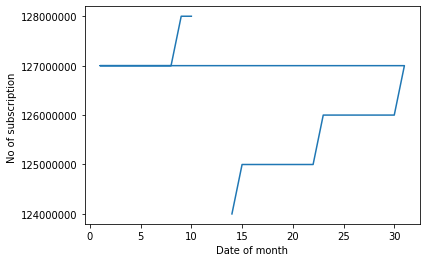

In [201]:
plt.plot(tseries['Date_day'],tseries['Total_Subscribers'])
plt.ylabel('No of subscription ')
plt.xlabel('Date of month')

## Graph between date and change in views 

### 1) from graph we can say number of views from 15 jan to 10 feb  is increasing 

### 2)  change in views is difference between today and yesterday so we can say number of views on one day

### 3) we can say total views in daily  is increasing with time (but we can't say increasing with time because it could be seasonal time so we can't say for this small data 

Text(0.5, 0, 'Date of month')

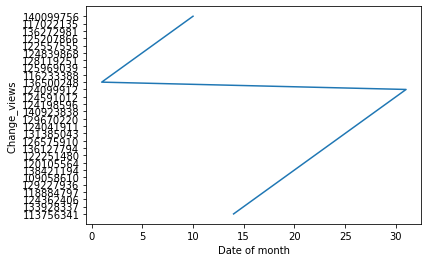

In [202]:
plt.plot(tseries['Date_day'],tseries['Change_views'])
plt.ylabel('Change_views ') 
plt.xlabel('Date of month')  

In [206]:
tseries.head()

,Total_Subscribers,Change_views,Total_views,Date_day,min_earn,max_earn
0,124000000,113756341,95326102355,14,56878,227513
1,125000000,133928337,95439858696,15,66964,267857
2,125000000,124362406,95573787033,16,62181,248725
3,125000000,118884797,95698149439,17,59442,237770
4,125000000,129227936,95817034236,18,64614,258456


### we try to plot graph between date and max_earning and minimum_earn

Text(0.5, 0, 'date')

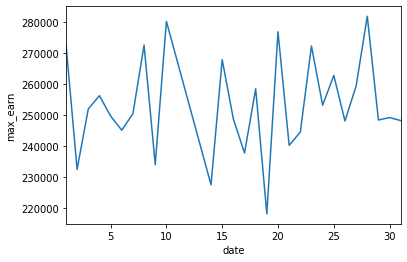

In [226]:
tseries.groupby('Date_day')['max_earn'].mean().plot(kind='line')
plt.ylabel('max_earn')
plt.xlabel('date')
# we can see after 20jan not much drop in max_earning 
# recommendation release near festival or independence or special event

Text(0.5, 0, 'date')

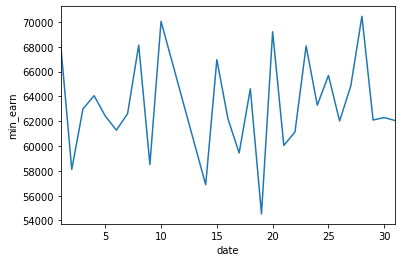

In [225]:
tseries.groupby('Date_day')['min_earn'].mean().plot(kind='line') # both graph are same for min_earning
plt.ylabel('min_earn')
plt.xlabel('date')

### Graph between earning and Total_Subscribers 

### 1) almost not much difference between subscription but if subscription will increase then views will increase then earning will increase


Text(0.5, 0, 'Total_Subscribers')

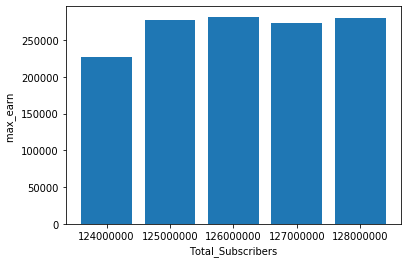

In [227]:
plt.bar(tseries['Total_Subscribers'],tseries['max_earn'])
plt.ylabel('max_earn ')  
plt.xlabel('Total_Subscribers')  

Text(0.5, 0, 'Total_Subscribers')

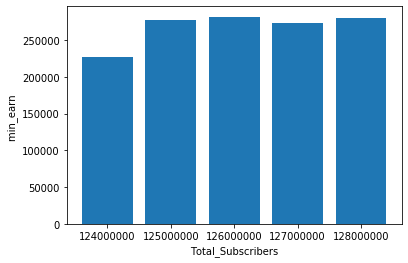

In [228]:
plt.bar(tseries['Total_Subscribers'],tseries['max_earn'])
plt.ylabel('min_earn ') 
plt.xlabel('Total_Subscribers')  

###  Views vs max_earn  : from  graph we can't say so much but I read from this link                                                     https://influencermarketinghub.com/4-factors-affect-youtube-earnings-potential/  that earning depend on views coming from which country like some dollars on per 1000 views

Text(0.5, 0, 'Change_views')

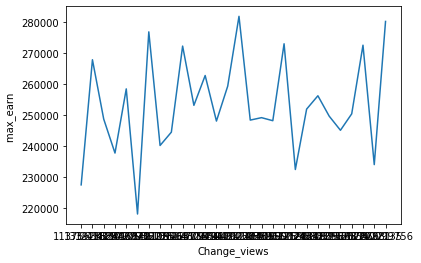

In [243]:
plt.plot(tseries['Change_views'],tseries['max_earn'])
plt.ylabel('max_earn ') 
plt.xlabel('Change_views')  

### Let we try to predict one by one min_earn and max_earn


In [258]:
tseries.head() # values are very large so it needs to scale the data before applying model

,Total_Subscribers,Change_views,Total_views,Date_day,min_earn,max_earn
0,124000000,113756341,95326102355,14,56878,227513
1,125000000,133928337,95439858696,15,66964,267857
2,125000000,124362406,95573787033,16,62181,248725
3,125000000,118884797,95698149439,17,59442,237770
4,125000000,129227936,95817034236,18,64614,258456


In [245]:
target_min=tseries['min_earn']
target_max=tseries['max_earn']
X=tseries.drop(columns=['min_earn','max_earn'],axis=1)

## Target variable as min_earn

In [264]:
# first we apply linear regression model 
# then we check the assumption of linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, target_min, test_size=0.30, random_state=42)
sc=StandardScaler()

In [265]:
scaleXtrain=sc.fit_transform(X_train)
scaleXtest=sc.transform(X_test)
lr=LinearRegression()
model=lr.fit(scaleXtrain,y_train)
ypred=lr.predict(scaleXtest)
print('R square ',r2_score(y_test,ypred))# Rsquare is measurement metrics in regression problem it tells explained variation of target variable explained by independent variable
print('RMSE' ,np.sqrt(mean_squared_error(y_test,ypred)))

R square  0.9999999844413543
RMSE 0.42046453745734585


## Target variable as max_earn

In [266]:
# first we apply linear regression model 
# then we check the assumption of linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, target_max, test_size=0.30, random_state=42)
sc=StandardScaler()
scaleXtrain=sc.fit_transform(X_train)
scaleXtest=sc.transform(X_test)
lr=LinearRegression()
model=lr.fit(scaleXtrain,y_train)
ypred=lr.predict(scaleXtest)
print('R square ',r2_score(y_test,ypred))# Rsquare is measurement metrics in regression problem it tells explained variation of target variable explained by independent variable
print('RMSE' ,np.sqrt(mean_squared_error(y_test,ypred)))

R square  0.9999999995733618
RMSE 0.27850519857344563


### 1)  From this dataset we not get much information because of less data on the website restriction  but some website has advanced machine learning that analysing live and plot graphs  so we learn from there one of them is https://www.noxinfluencer.com/youtube/channel/UCq-Fj5jknLsUf-MWSy4_brA 
\

### 2) From graph we can say that male and female both are equally visiting on tseries channel but there is one important thing age group is very important 18 to 34 age group are more active on this channel 

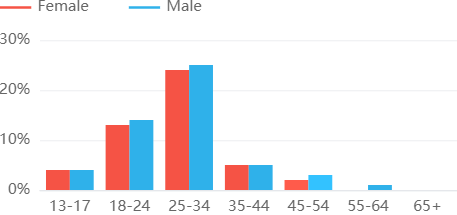

In [284]:
from IPython.display import Image
Image(filename='download.PNG') # this image is imported from the above link 


## Pie chart of audience  coming from which country
### From the graph maximum views are coming from india , united states and others countries 

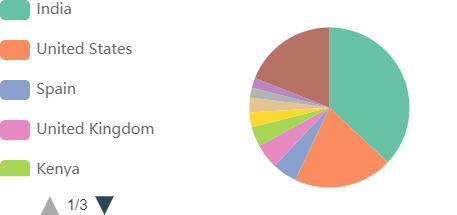

In [285]:
from IPython.display import Image
Image(filename='download1.PNG') # this image is imported from the above link 
# Brown are others not in the list due to a sequence list in link

### Bar Plot of Active users at time distribution of 24 hour

#### 1) lowest time range is 00:00 to 8:00 and after almost equal distribution of time , peak time when user active is after 22:00

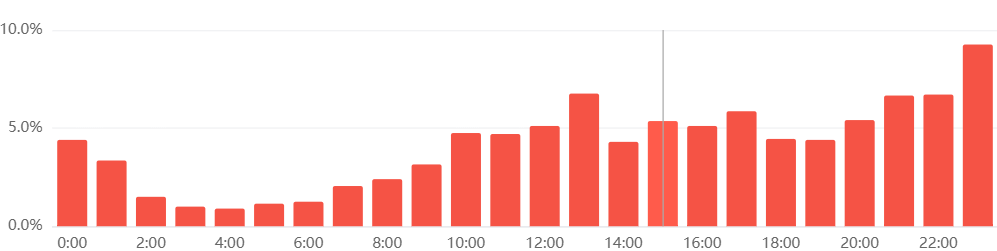

In [286]:
from IPython.display import Image
Image(filename='download2.PNG')